#PRAKTIKUM 8
# Evaluasi Beberapa Algoritma Klasifikasi

Tujuan :
Setelah mengikuti praktikum ini praktikan
1.   Memahasi Evaluasi beberapa metrik untuk mengukur kinerja klasifikasi
2.   Mahasiswa dapat memahami confisin matrik dan perananya untuk evaluasi klasifikasi
3. Memehami dan mampu menggunakan evaluasi k-fold








Nama  : Salma Adzra Fathina

NIM   : 225150207111042

Kelas : TIF - F

##Dasar Teori

Validasi klasifikasi

Metode klasifikasi dibangun untuk dapat belajar dan diharapakan dapat membuat prediksi atau keputusan suatu data baru berdasarkan data yang sudah ada. Proses pembelajaran terhadap dataset yang sudah ada untuk mendapatkan model. Selanjutnya suatu data baru yang belum teridentifikasi dapat ditentukan label atau kelasnya berdasarkan model yang telah dibangun.
Proses pembelajaran yang dibangun terhadap suatu datasaet dilakukan dengan cara membagi suatu data menjadi dua bagian yakni sebagian digunakan sebagai data pelatihan dan sebagian lainnya sebagai data validasi. Besaran jumlah masing-masing data pelatihan dan data validasi dapat ditentukan (50%,50%) atau (75%,25%).
Tahap selanjutnya data pelatihan akan digunakan untuk membagun model dengan menentukan parameter terbaik dari masing-masing model berdasrakan dataset yang ada. Kinerja terbaik dari suatu model yang dikembangkan diukur menggunakan beberap tolok ukur sebagai berikut :
- presison
- recall
- specifity
- akurasi
Masing-masing metrik tersebut ditentukan berdasarkan matrik kebingungan.



Confusion matrik
Mtriks kebingungan atau matriks kesalahan adalah suatu tabel yang merepresentasikan kinerja suatu algoritma. Setiap baris matriks mewakili instance di kelas yang diprediksi sementara setiap kolom mewakili instance di kelas yang sebenarnya (atau sebaliknya).

#Beberapa tahapan dalam valisasi klasifikasi


Beberapa metode klasifikasi yang telah dipelajari mempunyai kelebihan dan kekurannya. Perbandingan kinerja antar metode klasifikasi ini diukur menggunakan beberapa metrik.  Pada praktikum ini akan dibahas beberapa metrik untuk mengukur kinerja klasifikasi.
Tahapan untuk mengevaluasi suatu metode klasifikasi dilakukan sebagai berikut :
- Pisahkan set data validasi.
- Siapkan test harness untuk menggunakan validasi silang 10 kali lipat.
- Buat beberapa model berbeda untuk memprediksi spesies dari pengukuran bunga
- Pilih model terbaik.

##1. Tentukan metode klasifikasi yang akan dievaluasi

In [337]:
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [338]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

##2. Baca dataset
Pada contoh ini terdapat tiga buah dataset yakni :
- dataR2
- iris data
- breast cancer

Kita akan gunakan dataR2 sebagai contoh sedangkan dua data berikunya akan digunakan sabagai latihan.

In [339]:
if not os.path.exists('dataR2.csv'):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv

In [340]:
if not os.path.exists('iris.csv'):
  !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

In [341]:
if not os.path.exists('breast_cancer.csv'):
  !wget https://raw.githubusercontent.com/frnkldgnwn/utp-ppm/main/breast_cancer.csv

In [342]:
dataset = pd.read_csv('dataR2.csv')
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


##3.1 Membuat Set Data Validasi
Tujuan evaluasi adalah memperkirakan keakuratan model terbaik pada data tak terlihat dengan mengevaluasinya pada data tak terlihat aktual. Evaluasi ini dilakukan dengan cara membagi dataset menjadi dua bagian yakni sebagian digunakan sebagai data latih dan sebagian yang lain digunakan sebagai data uji. Beberapa praktikum sebelumnya telah dipraktekkan dengan menggunakan metode train_test_split :
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


Sebelum membuat data latih dan data uji. Langkah pertama pisahkan antara data attribute dan data label suatu dataset. Karena datasaet data2R terdiri dari 9 attribut dan 1 label.  Maka kita catat X sebagai data dan Y sebagai label.

In [343]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:9]
y = array[:,9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

##3.2 K-Fold Cross Validation
k-Fold Cross-Validation Validasi silang adalah prosedur pengambilan sampel ulang yang digunakan untuk mengevaluasi model pembelajaran mesin pada sampel data terbatas. Prosedur ini memiliki parameter tunggal yang disebut k yang mengacu pada jumlah grup yang akan dipecah menjadi sampel data tertentu. Karena itu, prosedur ini sering disebut k-fold cross-validation. Ketika nilai spesifik untuk k dipilih, nilai tersebut dapat digunakan sebagai pengganti k dalam referensi ke model, seperti k = 10 menjadi validasi silang 10 kali lipat.

Validasi silang terutama digunakan dalam pembelajaran mesin terapan untuk memperkirakan kemampuan model pembelajaran mesin pada data yang tidak terlihat. Yaitu, menggunakan sampel terbatas untuk memperkirakan bagaimana performa model secara umum saat digunakan untuk membuat prediksi pada data yang tidak digunakan selama pelatihan model.

Prosedur umumnya adalah sebagai berikut:
- Acak kumpulan data berdasarkan id
- Pisahkan kumpulan data menjadi kelompok k
- Untuk setiap grup unik:
  - Ambil kelompok sebagai kelompok data uji
  - Ambil kelompok yang tersisa sebagai kumpulan data pelatihan
  - Catat hasil pengujian masing-masing group

K-Fold ini digunakan untuk validasi model yang digunakan. Evaluasi dilakukan pada dataset latih. Pada praktikum ini digunakan k=10, berarti akan membagi dataset latih menjadi 10 bagian. Satu bagian digunakan untuk testing dan sisanya sebagai data latih.

In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.530000 (0.128241)
NB: 0.598889 (0.115945)
SVM: 0.564444 (0.017778)


##4. Buat Prediksi

Kita harus memilih algoritma yang akan digunakan untuk membuat prediksi.

##4.1 Membuat Prediksi
Kita dapat menyesuaikan model pada seluruh dataset pelatihan dan membuat prediksi pada dataset validasi.

In [345]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# 4.2 Evaluasi Prediksi
Kami dapat mengevaluasi prediksi dengan membandingkannya dengan hasil yang diharapkan dalam set validasi, lalu menghitung akurasi klasifikasi, serta matriks kebingungan dan laporan klasifikasi.

In [346]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
from sklearn.metrics import classification_report
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.50      1.00      0.67        12

    accuracy                           0.50        24
   macro avg       0.25      0.50      0.33        24
weighted avg       0.25      0.50      0.33        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Tugas :

1. Lakukan perbandingan klasifikasi antara SVM, Naive Bayes, KNN untuk dataset iris dan breast cancer
2. Pada kedua dataset lakukan proses normaslisai data dan preproses data untuk menengani data yang hilang jika ada.

## Dataset

In [347]:
data_iris = pd.read_csv('iris.csv')
data_bc = pd.read_csv('breast_cancer.csv')
data_iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [348]:
data_bc.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nucklei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,1000025,5.0,1.0,NaN,1.0,NaN,1.0,3.0,1.0,1.0,benign
1,1002945,5.0,4.0,4.0,5.0,7.0,NaN,3.0,NaN,1.0,benign
2,1015425,3.0,1.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,benign
3,1016277,6.0,8.0,8.0,1.0,3.0,NaN,3.0,7.0,1.0,benign
4,1017023,4.0,1.0,1.0,3.0,NaN,1.0,3.0,1.0,NaN,benign


In [349]:
print(data_iris.info())
print(data_bc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   clump_thickness       90 non-null     float64
 2   cell_size             90 non-null     float64
 3   cell_shape            90 non-null     float64
 4   marginal_adhesion     90 non-null     float64
 5   epithelial_cell_size  90 non-null     float64
 6   bare_nucklei         

In [350]:
print(data_iris.isnull().sum())
print(data_bc.isnull().sum())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
id                       0
clump_thickness         10
cell_size               10
cell_shape              10
marginal_adhesion       10
epithelial_cell_size    10
bare_nucklei            10
bland_chromatin         10
normal_nucleoli         10
mitoses                 10
diagnosis                0
dtype: int64


In [351]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [352]:
data_bc.describe().T


,count,mean,std,min,25%,50%,75%,max
id,100.0,1.097546e+06,44769.331515,1000025.0,1064182.50,1107599.5,1127636.25,1170419.0
clump_thickness,90.0,5.055556e+00,3.018151,1.0,2.25,5.0,8.00,10.0
cell_size,90.0,3.466667e+00,2.864741,1.0,1.00,3.0,5.00,10.0
cell_shape,90.0,3.700000e+00,2.861798,1.0,1.00,3.0,5.75,10.0
marginal_adhesion,90.0,2.933333e+00,2.819674,1.0,1.00,1.0,4.00,10.0
epithelial_cell_size,90.0,3.733333e+00,2.621433,1.0,2.00,2.0,5.00,10.0
bare_nucklei,90.0,3.700000e+00,3.419869,1.0,1.00,2.0,6.75,10.0
bland_chromatin,90.0,3.955556e+00,2.016288,1.0,3.00,3.0,5.00,9.0
normal_nucleoli,90.0,3.477778e+00,3.257585,1.0,1.00,1.0,6.00,10.0
mitoses,90.0,2.133333e+00,2.380633,1.0,1.00,1.0,2.00,10.0


In [353]:
print(data_iris.duplicated().sum())
print(data_bc.duplicated().sum())

1
0


In [354]:
data_iris = data_iris.drop_duplicates()
data_bc = data_bc.drop_duplicates()
print(data_iris.duplicated().sum())
print(data_bc.duplicated().sum())

0
0


##Preprocessing iris

In [355]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal.width,149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal.length,149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal.width,149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5


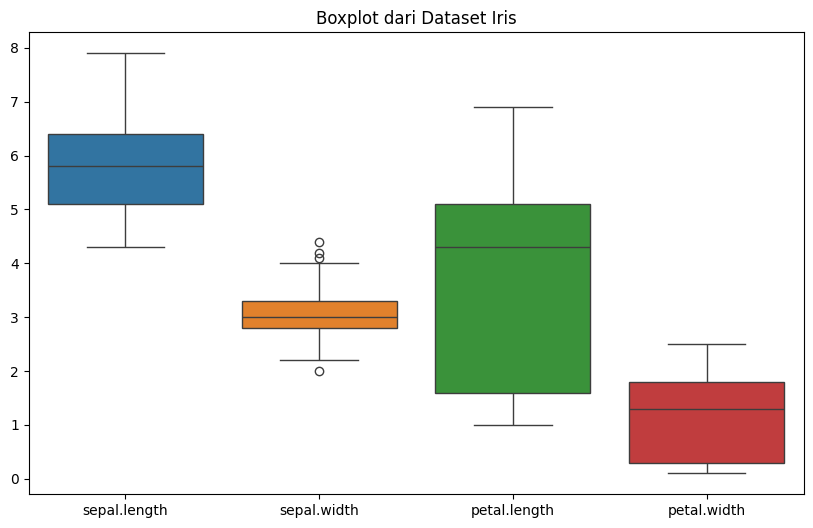

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_iris)
plt.title('Boxplot dari Dataset Iris')
plt.show()

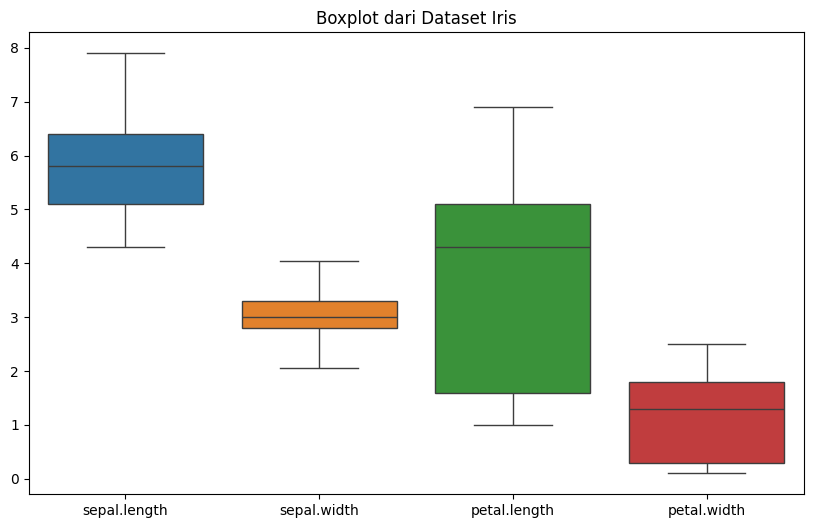

In [357]:
outlier_cols = ["sepal.width"]

Q1 = data_iris[outlier_cols].quantile(0.25)
Q3 = data_iris[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_iris[outlier_cols] = data_iris[outlier_cols].apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_iris)
plt.title('Boxplot dari Dataset Iris')
plt.show()

In [358]:
data_bc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,1.097546e+06,44769.331515,1000025.0,1064182.50,1107599.5,1127636.25,1170419.0
clump_thickness,90.0,5.055556e+00,3.018151,1.0,2.25,5.0,8.00,10.0
cell_size,90.0,3.466667e+00,2.864741,1.0,1.00,3.0,5.00,10.0
cell_shape,90.0,3.700000e+00,2.861798,1.0,1.00,3.0,5.75,10.0
marginal_adhesion,90.0,2.933333e+00,2.819674,1.0,1.00,1.0,4.00,10.0
epithelial_cell_size,90.0,3.733333e+00,2.621433,1.0,2.00,2.0,5.00,10.0
bare_nucklei,90.0,3.700000e+00,3.419869,1.0,1.00,2.0,6.75,10.0
bland_chromatin,90.0,3.955556e+00,2.016288,1.0,3.00,3.0,5.00,9.0
normal_nucleoli,90.0,3.477778e+00,3.257585,1.0,1.00,1.0,6.00,10.0
mitoses,90.0,2.133333e+00,2.380633,1.0,1.00,1.0,2.00,10.0


## preprocessing breast cancer

In [359]:
from sklearn.impute import SimpleImputer

missing_cols = data_bc.columns[1:10]

imputer = SimpleImputer(strategy='most_frequent')
data_bc[missing_cols] = imputer.fit_transform(data_bc[missing_cols])

print(data_bc.isnull().sum())

id                      0
clump_thickness         0
cell_size               0
cell_shape              0
marginal_adhesion       0
epithelial_cell_size    0
bare_nucklei            0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
diagnosis               0
dtype: int64


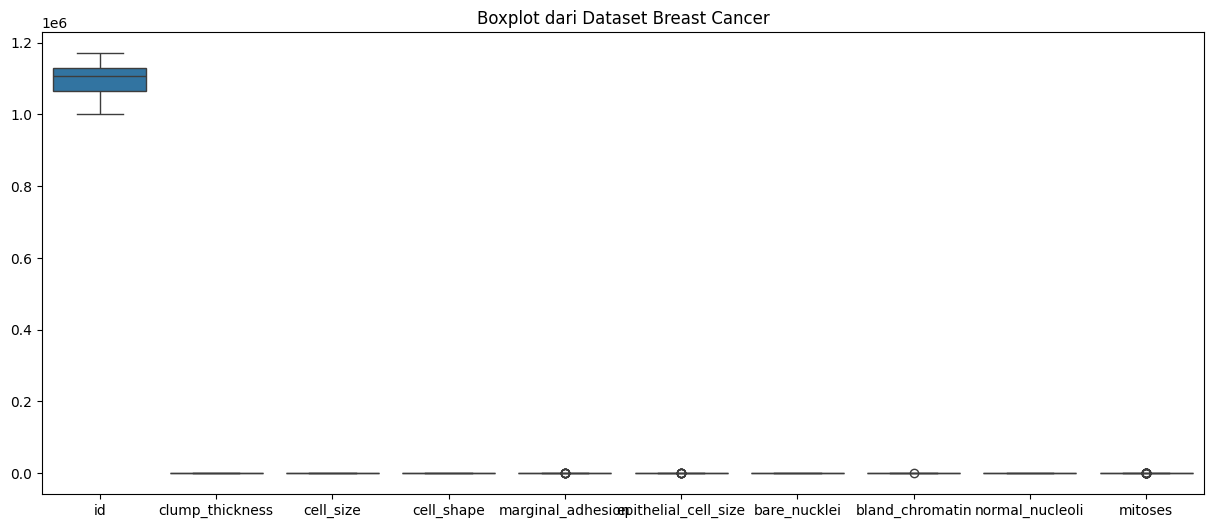

In [360]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_bc)
plt.title('Boxplot dari Dataset Breast Cancer')
plt.show()

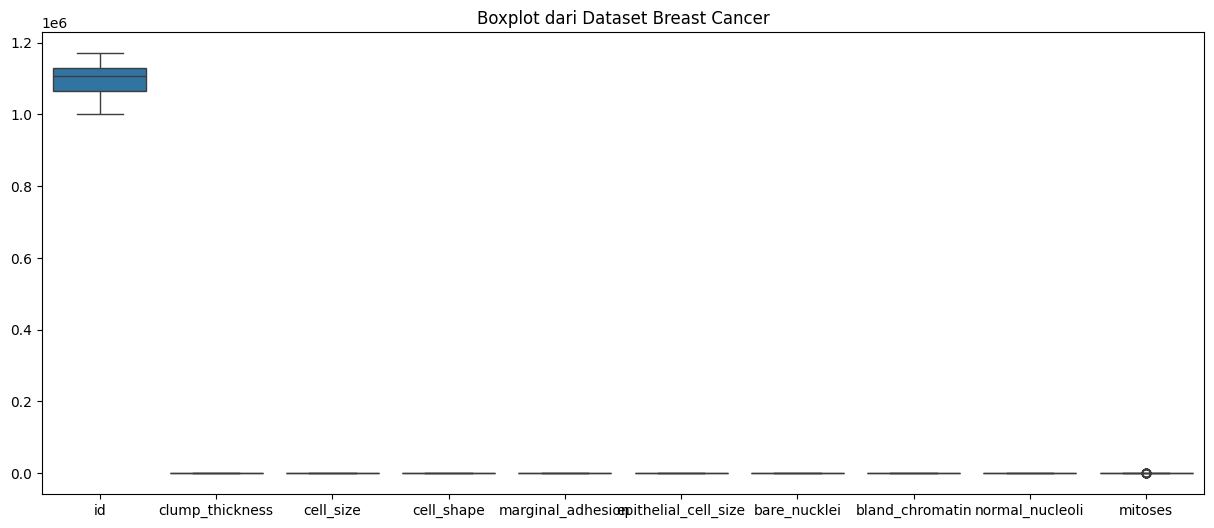

In [361]:
outlier_cols = ["marginal_adhesion", "bland_chromatin", "mitoses", "epithelial_cell_size"]

Q1 = data_bc[outlier_cols].quantile(0.25)
Q3 = data_bc[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

for col in outlier_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data_bc[col] = np.clip(data_bc[col], lower_bound, upper_bound)

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_bc)
plt.title('Boxplot dari Dataset Breast Cancer')
plt.show()

In [362]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [363]:
data_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   clump_thickness       100 non-null    float64
 2   cell_size             100 non-null    float64
 3   cell_shape            100 non-null    float64
 4   marginal_adhesion     100 non-null    float64
 5   epithelial_cell_size  100 non-null    float64
 6   bare_nucklei          100 non-null    float64
 7   bland_chromatin       100 non-null    float64
 8   normal_nucleoli       100 non-null    float64
 9   mitoses               100 non-null    float64
 10  diagnosis             100 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 8.7+ KB


In [364]:
X1 = data_iris[data_iris.columns[0:4]]
y1 = data_iris['variety']

X2 = data_bc[data_bc.columns[1:10]]
y2 = data_bc['diagnosis']

In [365]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [366]:
y1.info()

<class 'pandas.core.series.Series'>
Index: 149 entries, 0 to 149
Series name: variety
Non-Null Count  Dtype 
--------------  ----- 
149 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [367]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clump_thickness       100 non-null    float64
 1   cell_size             100 non-null    float64
 2   cell_shape            100 non-null    float64
 3   marginal_adhesion     100 non-null    float64
 4   epithelial_cell_size  100 non-null    float64
 5   bare_nucklei          100 non-null    float64
 6   bland_chromatin       100 non-null    float64
 7   normal_nucleoli       100 non-null    float64
 8   mitoses               100 non-null    float64
dtypes: float64(9)
memory usage: 7.2 KB


In [368]:
y2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(X1)
X1 = pd.DataFrame(iris_scaled, columns=X1.columns)


bc_scaled = scaler.fit_transform(X2)
X2 = pd.DataFrame(bc_scaled, columns=X2.columns)


In [370]:
X1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,149.0,0.428784,0.230792,0.0,0.222222,0.416667,0.583333,1.0
sepal.width,149.0,0.503188,0.212913,0.0,0.375000,0.475000,0.625000,1.0
petal.length,149.0,0.465931,0.299626,0.0,0.101695,0.559322,0.694915,1.0
petal.width,149.0,0.456096,0.317759,0.0,0.083333,0.500000,0.708333,1.0


In [371]:
X2.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,100.0,0.450000,0.317968,0.0,0.222222,0.444444,0.666667,1.0
cell_size,100.0,0.246667,0.312910,0.0,0.000000,0.111111,0.444444,1.0
cell_shape,100.0,0.270000,0.314767,0.0,0.000000,0.166667,0.444444,1.0
marginal_adhesion,100.0,0.220667,0.336576,0.0,0.000000,0.000000,0.400000,1.0
epithelial_cell_size,100.0,0.297059,0.288463,0.0,0.117647,0.117647,0.470588,1.0
bare_nucklei,100.0,0.270000,0.371465,0.0,0.000000,0.000000,0.472222,1.0
bland_chromatin,100.0,0.407143,0.272702,0.0,0.285714,0.285714,0.571429,1.0
normal_nucleoli,100.0,0.247778,0.353083,0.0,0.000000,0.000000,0.444444,1.0
mitoses,100.0,0.250000,0.435194,0.0,0.000000,0.000000,0.250000,1.0


##Model Iris

In [372]:
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1, y1, test_size=0.20, random_state=42, shuffle=True)

In [373]:
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X1_train, y1_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.932576 (0.050303)
NB: 0.932576 (0.050303)
SVM: 0.950000 (0.055277)


dari hasil validasi kfold diatas, algoritma SVM memiliki akurasi yang paling baik

In [374]:
#dengan model KNN

#iris_KNN = KNeighborsClassifier()
#iris_KNN.fit(X1_train, y1_train)
#prediction_KNN = iris_KNN.predict(X1_validation)

In [375]:
#print(classification_report(y1_validation, prediction_KNN))

In [376]:
#dengan model naive bayes

#iris_NB = GaussianNB()
#iris_NB.fit(X1_train, y1_train)
#prediction_NB = iris_NB.predict(X1_validation)

In [377]:
#print(classification_report(y1_validation, prediction_NB))

In [378]:
#dengan model SVM

iris_SVM = SVC()
iris_SVM.fit(X1_train, y1_train)
predictions_SVM = iris_SVM.predict(X1_validation)

In [379]:
print(classification_report(y1_validation, predictions_SVM))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Model Breast Cancer

In [380]:
X2_train, X2_validation, y2_train, y2_validation = train_test_split(X2, y2, test_size=0.20, random_state=2, shuffle=True)

In [381]:
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.937500 (0.100778)
NB: 0.925000 (0.082916)
SVM: 0.925000 (0.100000)


dari validasi Kfold diatas, algoritma KNN memiliki akurasi paling baik

In [382]:
#dengan model KNN

bc_KNN = KNeighborsClassifier()
bc_KNN.fit(X2_train, y2_train)
prediction_KNN_bc = bc_KNN.predict(X2_validation)

In [383]:
print(classification_report(y2_validation, prediction_KNN_bc))

              precision    recall  f1-score   support

      benign       1.00      0.93      0.96        14
   malignant       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



In [384]:
#dengan model naive bayes

#bc_NB = GaussianNB()
#bc_NB.fit(X2_train, y2_train)
#prediction_NB_bc = bc_NB.predict(X2_validation)

In [385]:
#print(classification_report(y2_validation, prediction_NB_bc))

In [386]:
#dengan model SVM

#bc_NB = SVC()
#bc_NB.fit(X2_train, y2_train)
#predictions_SVM_bc = bc_NB.predict(X2_validation)

In [387]:
#print(classification_report(y2_validation, predictions_SVM_bc))